In [1]:
import os
import glob
#import tqdm
import numpy as np
#import pandas as pd
import multiprocessing
import pydicom as dicom
import nibabel as nib
#from keras import utils as kutils
from matplotlib import pyplot as plt

def load_image(label_fpath, transpose=False):
    #encode_name = label_fpath[-39: -7]
    label_data = nib.load(label_fpath)
    label_array = label_data.get_fdata()
    if transpose:
        label_array = np.transpose(label_array, axes=(2, 1, 0))
    return  label_array#, encode_name

In [2]:
cd ..

/home/u/wartytw


In [47]:
label_path = "/data2/pancreas/Nifti_data/label"

In [48]:
names = os.listdir(label_path)
#print(names[:2])
#names.remove(names[0])
#print(names[:2])
print(len(names))
for x in names :
    if(x[4] != 'C'):
        print(x)
        names.remove(x)

563
LB_PT0041.nii.gz
LB_PT0012.nii.gz
LB_PT0046.nii.gz
LB_PT0047.nii.gz
LB_PT0006.nii.gz
LB_PT0050.nii.gz
LB_PT0004.nii.gz
LB_PT0040.nii.gz
LB_PT0029.nii.gz
LB_PT0028.nii.gz
LB_PT0030.nii.gz
LB_PT0010.nii.gz
LB_PT0044.nii.gz
LB_PT0060.nii.gz
LB_PT0063.nii.gz
LB_NP0008.nii.gz
LB_PT0037.nii.gz
LB_NP0010.nii.gz
LB_PT0035.nii.gz
LB_NP0009.nii.gz
LB_NP0002.nii.gz
LB_PT0053.nii.gz
LB_PT0052.nii.gz
LB_PT0025.nii.gz
LB_PT0026.nii.gz
LB_PT0014.nii.gz
LB_PT0016.nii.gz
LB_PT0009.nii.gz


In [55]:
names[319:321]

['LB_PT0027.nii.gz', 'LB_PT0031.nii.gz']

In [49]:
print(len(names))

535


In [38]:
box_pancreas = np.zeros((len(names), 6))
box_tumor = np.zeros((len(names), 6))

In [39]:
for idx, name in enumerate(names):
    label = load_image(os.path.join(label_path, name))
    for j in range(3):
        if(np.unique(np.where(label == 1)).size == 0):
            box_pancreas[idx, j*2] = 0
            box_pancreas[idx, j*2+1] = 0
        else:
            box_pancreas[idx, j*2] = np.min(np.unique(np.where(label == 1)[j]))
            box_pancreas[idx, j*2+1] = np.max(np.unique(np.where(label == 1)[j]))
        if(np.unique(np.where(label == 2)).size == 0):
            box_tumor[idx, j*2] = 0
            box_tumor[idx, j*2+1] = 0
        else:
            box_tumor[idx, j*2] = np.min(np.unique(np.where(label == 2)[j]))
            box_tumor[idx, j*2+1] = np.max(np.unique(np.where(label == 2)[j]))

    print(idx)
    del label

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [86]:
print("Pancreas : ")
print("max =", np.max(box_pancreas[:, 1] - box_pancreas[:, 0]))
print("median =", np.median(box_pancreas[:, 1] - box_pancreas[:, 0]))
print("min =", np.min(box_pancreas[:, 1] - box_pancreas[:, 0]))
print("std =", np.std(box_pancreas[:, 1] - box_pancreas[:, 0]))
print("======================")
print("Tumor : ")
print("max =", np.max(box_tumor[:, 1] - box_tumor[:, 0]))
print("median =", np.median(box_tumor[:, 1] - box_tumor[:, 0]))
print("min =", np.min(box_tumor[:, 1] - box_tumor[:, 0]))
print("std =", np.std(box_tumor[:, 1] - box_tumor[:, 0]))

Pancreas : 
max = 374.0
median = 162.0
min = 0.0
std = 34.79087136799181
Tumor : 
max = 200.0
median = 44.0
min = 0.0
std = 33.48325936232425


In [7]:
print("Pancreas : ")
print("max =", np.max(box_pancreas[:, 1] - box_pancreas[:, 0]))
print("median =", np.median(box_pancreas[:, 1] - box_pancreas[:, 0]))
print("min =", np.min(box_pancreas[:, 1] - box_pancreas[:, 0]))
print("std =", np.std(box_pancreas[:, 1] - box_pancreas[:, 0]))
print("======================")
print("Tumor : ")
print("max =", np.max(box_tumor[:, 1] - box_tumor[:, 0]))
print("median =", np.median(box_tumor[:, 1] - box_tumor[:, 0]))
print("min =", np.min(box_tumor[:, 1] - box_tumor[:, 0]))
print("std =", np.std(box_tumor[:, 1] - box_tumor[:, 0]))

Pancreas : 
max = 374.0
median = 162.0
min = 0.0
std = 34.79087136799181
Tumor : 
max = 200.0
median = 44.0
min = 0.0
std = 33.48325936232425


In [27]:
np.where(box_pancreas[:, 5] == 0)

(array([319, 320]),)

In [20]:
box_pancreas[320, 3]

0.0

In [40]:
a = np.array([[1, 2, 3], [2, 4, 5], [2, 3, 1]])
print(a)
np.delete(a, (1), axis=0)

[[1 2 3]
 [2 4 5]
 [2 3 1]]


array([[1, 2, 3],
       [2, 3, 1]])

In [44]:
box_pancreas0 = box_pancreas
box_pancreas = np.delete(box_pancreas, (319), axis = 0)
box_pancreas = np.delete(box_pancreas, (319), axis = 0)
box_tumor0 = box_tumor
box_tumor = np.delete(box_tumor, (319), axis = 0)
box_tumor = np.delete(box_tumor, (319), axis = 0)

In [46]:
axis = ['x', 'y', 'z']
for idx, ax in enumerate(axis):
 
    
    print('Pancreas in '+ ax +': ')
    print("max =", np.max(box_pancreas[:,  idx*2+1] - box_pancreas[:, idx*2]))
    print("median =", np.median(box_pancreas[:, idx*2+1] - box_pancreas[:,  idx*2]))
    print("min =", np.min(box_pancreas[:, idx*2+1] - box_pancreas[:,  idx*2]))
    print("std =", np.std(box_pancreas[:, idx*2+1] - box_pancreas[:,  idx*2]))
    print("======================")
    print('Tumor in '+ ax +': ')
    print("max =", np.max(box_tumor[:, idx*2+1] - box_tumor[:, idx*2]))
    print("median =", np.median(box_tumor[:, idx*2+1] - box_tumor[:, idx*2]))
    print("min =", np.min(box_tumor[:, idx*2+1] - box_tumor[:, idx*2]))
    print("std =", np.std(box_tumor[:, idx*2+1] - box_tumor[:, idx*2]))
    print("======================")
    print("======================")

Pancreas in x: 
max = 374.0
median = 162.0
min = 42.0
std = 33.3568873575248
Tumor in x: 
max = 200.0
median = 44.0
min = 0.0
std = 33.02839943747105
Pancreas in y: 
max = 289.0
median = 90.0
min = 43.0
std = 23.631363940448942
Tumor in y: 
max = 220.0
median = 39.0
min = 0.0
std = 25.396997322719447
Pancreas in z: 
max = 112.0
median = 14.0
min = 2.0
std = 14.373229408972184
Tumor in z: 
max = 88.0
median = 4.0
min = 0.0
std = 6.756452101925569


In [3]:
print("Pancreas : ")
print("max =", np.max(box_pancreas[:, 1] - box_pancreas[:, 0]))
print("median =", np.median(box_pancreas[:, 1] - box_pancreas[:, 0]))
print("min =", np.min(box_pancreas[:, 1] - box_pancreas[:, 0]))
print("std =", np.std(box_pancreas[:, 1] - box_pancreas[:, 0]))
print("======================")
print("Tumor : ")
print("max =", np.max(box_tumor[:, 1] - box_tumor[:, 0]))
print("median =", np.median(box_tumor[:, 1] - box_tumor[:, 0]))
print("min =", np.min(box_tumor[:, 1] - box_tumor[:, 0]))
print("std =", np.std(box_tumor[:, 1] - box_tumor[:, 0]))

NameError: name 'box_pancreas' is not defined

Pancreas and Tumor : 


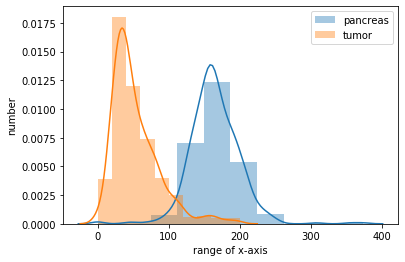

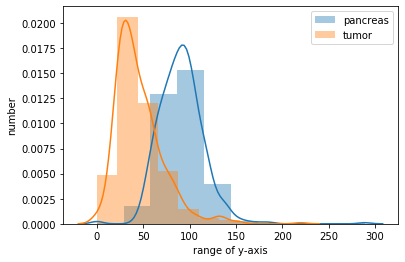

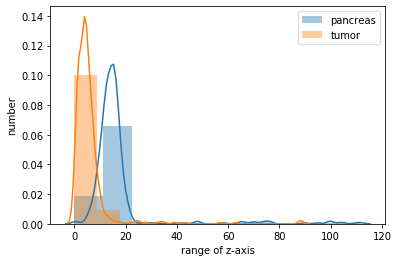

In [83]:
import seaborn as sns
print("Pancreas and Tumor : ")
sns.distplot(box_pancreas[:, 1] - box_pancreas[:, 0], bins = 10, label = "pancreas")
#plt.ylabel("number")
#plt.xlabel("range of x-axis")
sns.distplot(box_tumor[:, 1] - box_tumor[:, 0], bins = 10, label = "tumor")
plt.legend()
plt.ylabel("number")
plt.xlabel("range of x-axis")

plt.show()
sns.distplot(box_pancreas[:, 3] - box_pancreas[:, 2], bins = 10, label = "pancreas")
sns.distplot(box_tumor[:, 3] - box_tumor[:, 2], bins = 10, label = "tumor")
plt.legend()
plt.ylabel("number")
plt.xlabel("range of y-axis")
plt.show()
sns.distplot(box_pancreas[:, 5] - box_pancreas[:, 4], bins = 10, label = "pancreas")
sns.distplot(box_tumor[:, 5] - box_tumor[:, 4], bins = 10, label = "tumor")
plt.legend()
plt.ylabel("number")
plt.xlabel("range of z-axis")
plt.show()


In [69]:
print("Tumor : ")
print("max =", np.max(box_tumor[:, 1] - box_tumor[:, 0]))
print("median =", np.median(box_tumor[:, 1] - box_tumor[:, 0]))
print("min =", np.min(box_tumor[:, 1] - box_tumor[:, 0]))
print("std =", np.std(box_tumor[:, 1] - box_tumor[:, 0]))

Tumor : 
max = 200.0
median = 44.0
min = 0.0
std = 33.48325936232425


Tumor : 


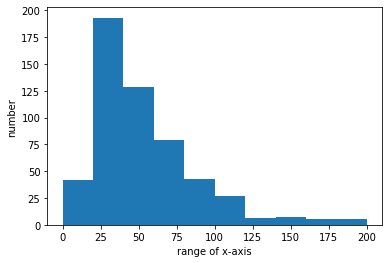

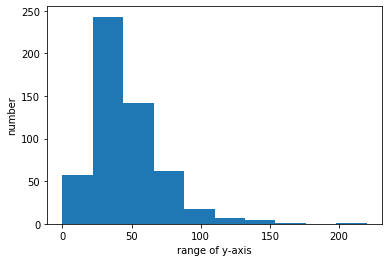

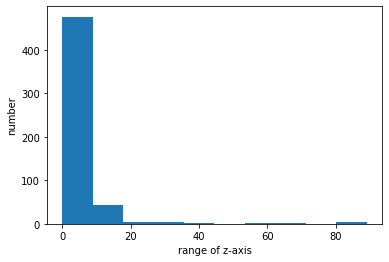

In [70]:
print("Tumor : ")
plt.hist(box_tumor[:, 1] - box_tumor[:, 0], bins = 10)
plt.ylabel("number")
plt.xlabel("range of x-axis")
plt.show()
plt.hist(box_tumor[:, 3] - box_tumor[:, 2], bins = 10)
plt.ylabel("number")
plt.xlabel("range of y-axis")
plt.show()
plt.hist(box_tumor[:, 5] - box_tumor[:, 4], bins = 10)
plt.ylabel("number")
plt.xlabel("range of z-axis")
plt.show()

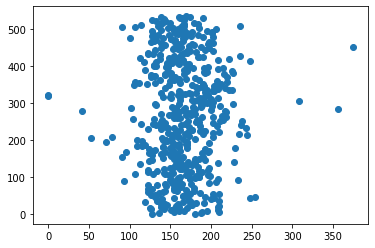

In [68]:
#plt.scatter(box_pancreas[:, 1] - box_pancreas[:, 0], [x for x in range(box_pancreas.shape[0])])

In [30]:
np.max(box_tumor)

519.0

In [28]:
name = names[319]
label = load_image(os.path.join(label_path, name))

In [37]:
np.unique(np.where(label == 1)).size == 0


True

In [ ]:
np.save("box_pancreas", box_pancreas)
np.save("box_tumor", box_tumor)

In [43]:
box_pancreas = np.load("box_pancreas.npy")
box_tumor = np.load("box_tumor.npy")

In [5]:
box_pancreas

3D_model/          resec_masking_dilation_info_multiple_tiles.ipynb
NewStart/          resec_train.npy
Resection_stage1/  resec_val.npy
box_pancreas.npy   y_train.npy
box_tumor.npy      y_val.npy


In [6]:
ls


3D_model/          resec_masking_dilation_info_multiple_tiles.ipynb
NewStart/          resec_train.npy
Resection_stage1/  resec_val.npy
box_pancreas.npy   y_train.npy
box_tumor.npy      y_val.npy
